In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import neighbors, datasets
import numpy as np

sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve) 

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

### Loading Data:

In [37]:
glass=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data')

In [38]:
glass.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [93]:
glass = glass.rename(columns={'1':'Id number', '1.52101':'Refractive index', '13.64':'Na', '4.49':'Mg', '1.10':'Al', '71.78':'Si', '0.06':'K',
                           '8.75':'Ca', '0.00':'Ba',  '0.00.1':'Fe', '1.1':'Type of class'})

In [94]:
glass.head()

,Id number,Refractive index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of class
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


### Descriptive Statistics :

In [98]:
glass.describe()

,Id number,Refractive index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of class
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [99]:
# It doesn't have any null values. The features are not on the same scale. For example Si has a mean of 72.65 while Fe has a mean value of 0.057. 

In [100]:
glass['Type of class'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type of class, dtype: int64

In [101]:
features = glass.columns[:-1].tolist()


In [102]:
features

['Id number',
 'Refractive index',
 'Na',
 'Mg',
 'Al',
 'Si',
 'K',
 'Ca',
 'Ba',
 'Fe']

In [103]:
### Correlation Matrix :

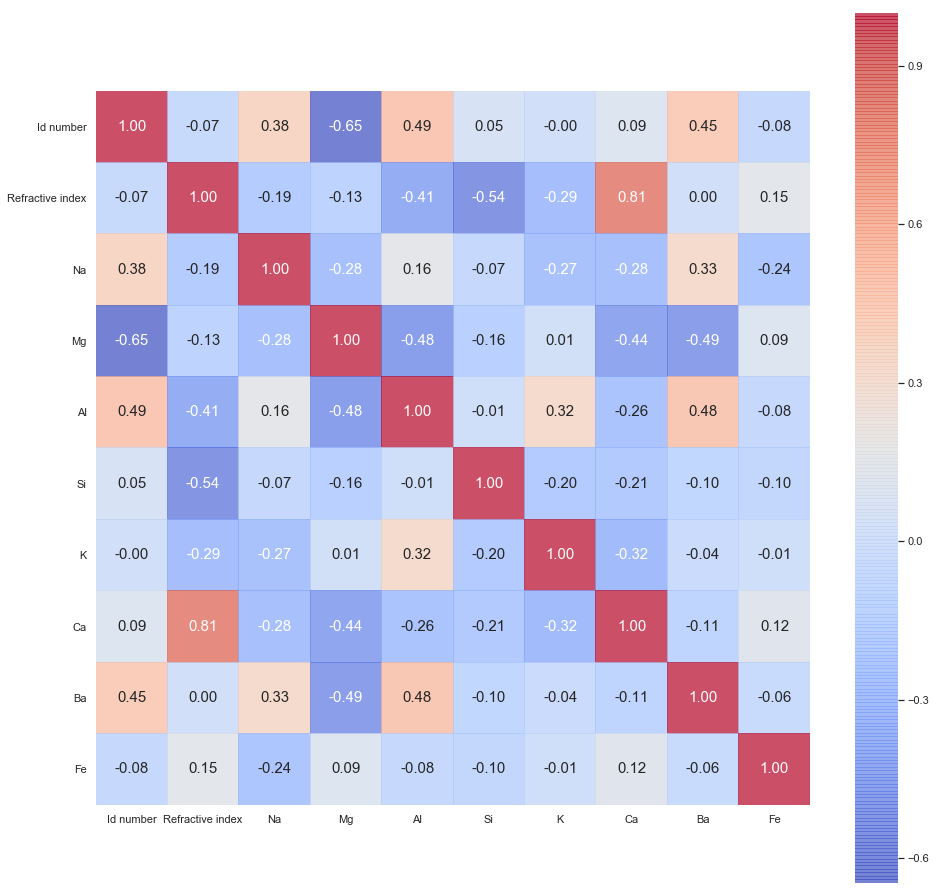

In [104]:
corr = glass[features].corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features, alpha = 0.7,   cmap= 'coolwarm')
plt.show()

In [105]:
# Strong positive correlation between Refractive andex and Ca

### Univariate and Bivariate analysis :

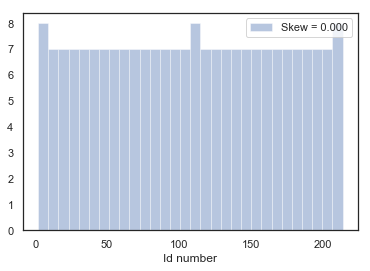

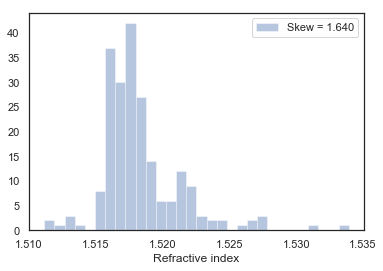

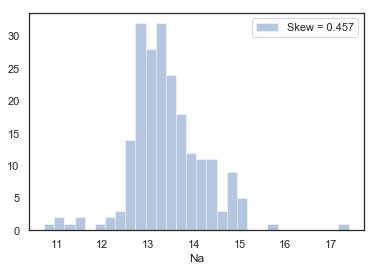

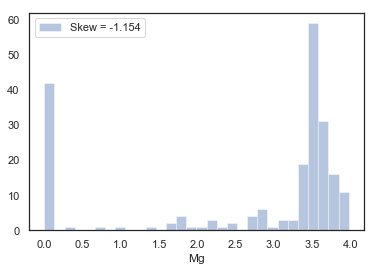

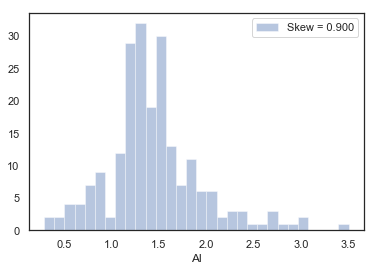

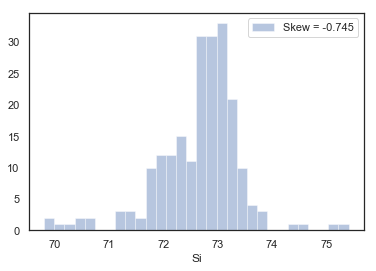

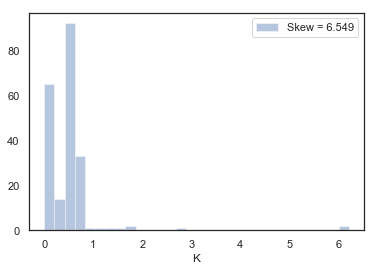

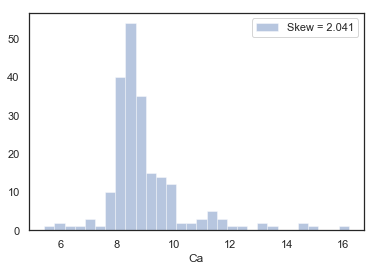

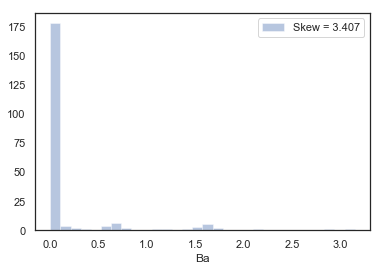

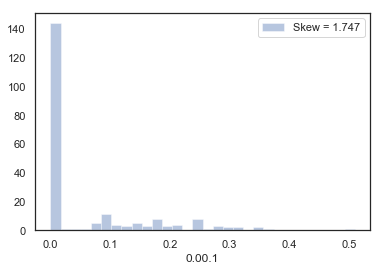

In [46]:
for feat in features:
    skew = glass[feat].skew()
    sns.distplot(glass[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()


In [107]:
# None of the features is normally distributed. The features Fe, Ba, Ca and K exhibit the highest skew coefficients. 
# Moreover, the distribution of potassium (K) and Barium (Ba) seem to contain many outliers.


In [138]:
# Detect observations with more than one outlier

def outlier_hunt(glass):
    """
    Takes a dataframe glass of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in glass.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(glass[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(glass[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
# Determine a list of indices of outliers for feature col
        outlier_list_col = glass[(glass[col] < Q1 - outlier_step) | (glass[col] > Q3 + outlier_step )].index
        
# append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
# select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(glass[features]))))   

The dataset contains 14 observations with more than 2 outliers


In [135]:
#Multivariate Analysis :

<Figure size 576x576 with 0 Axes>

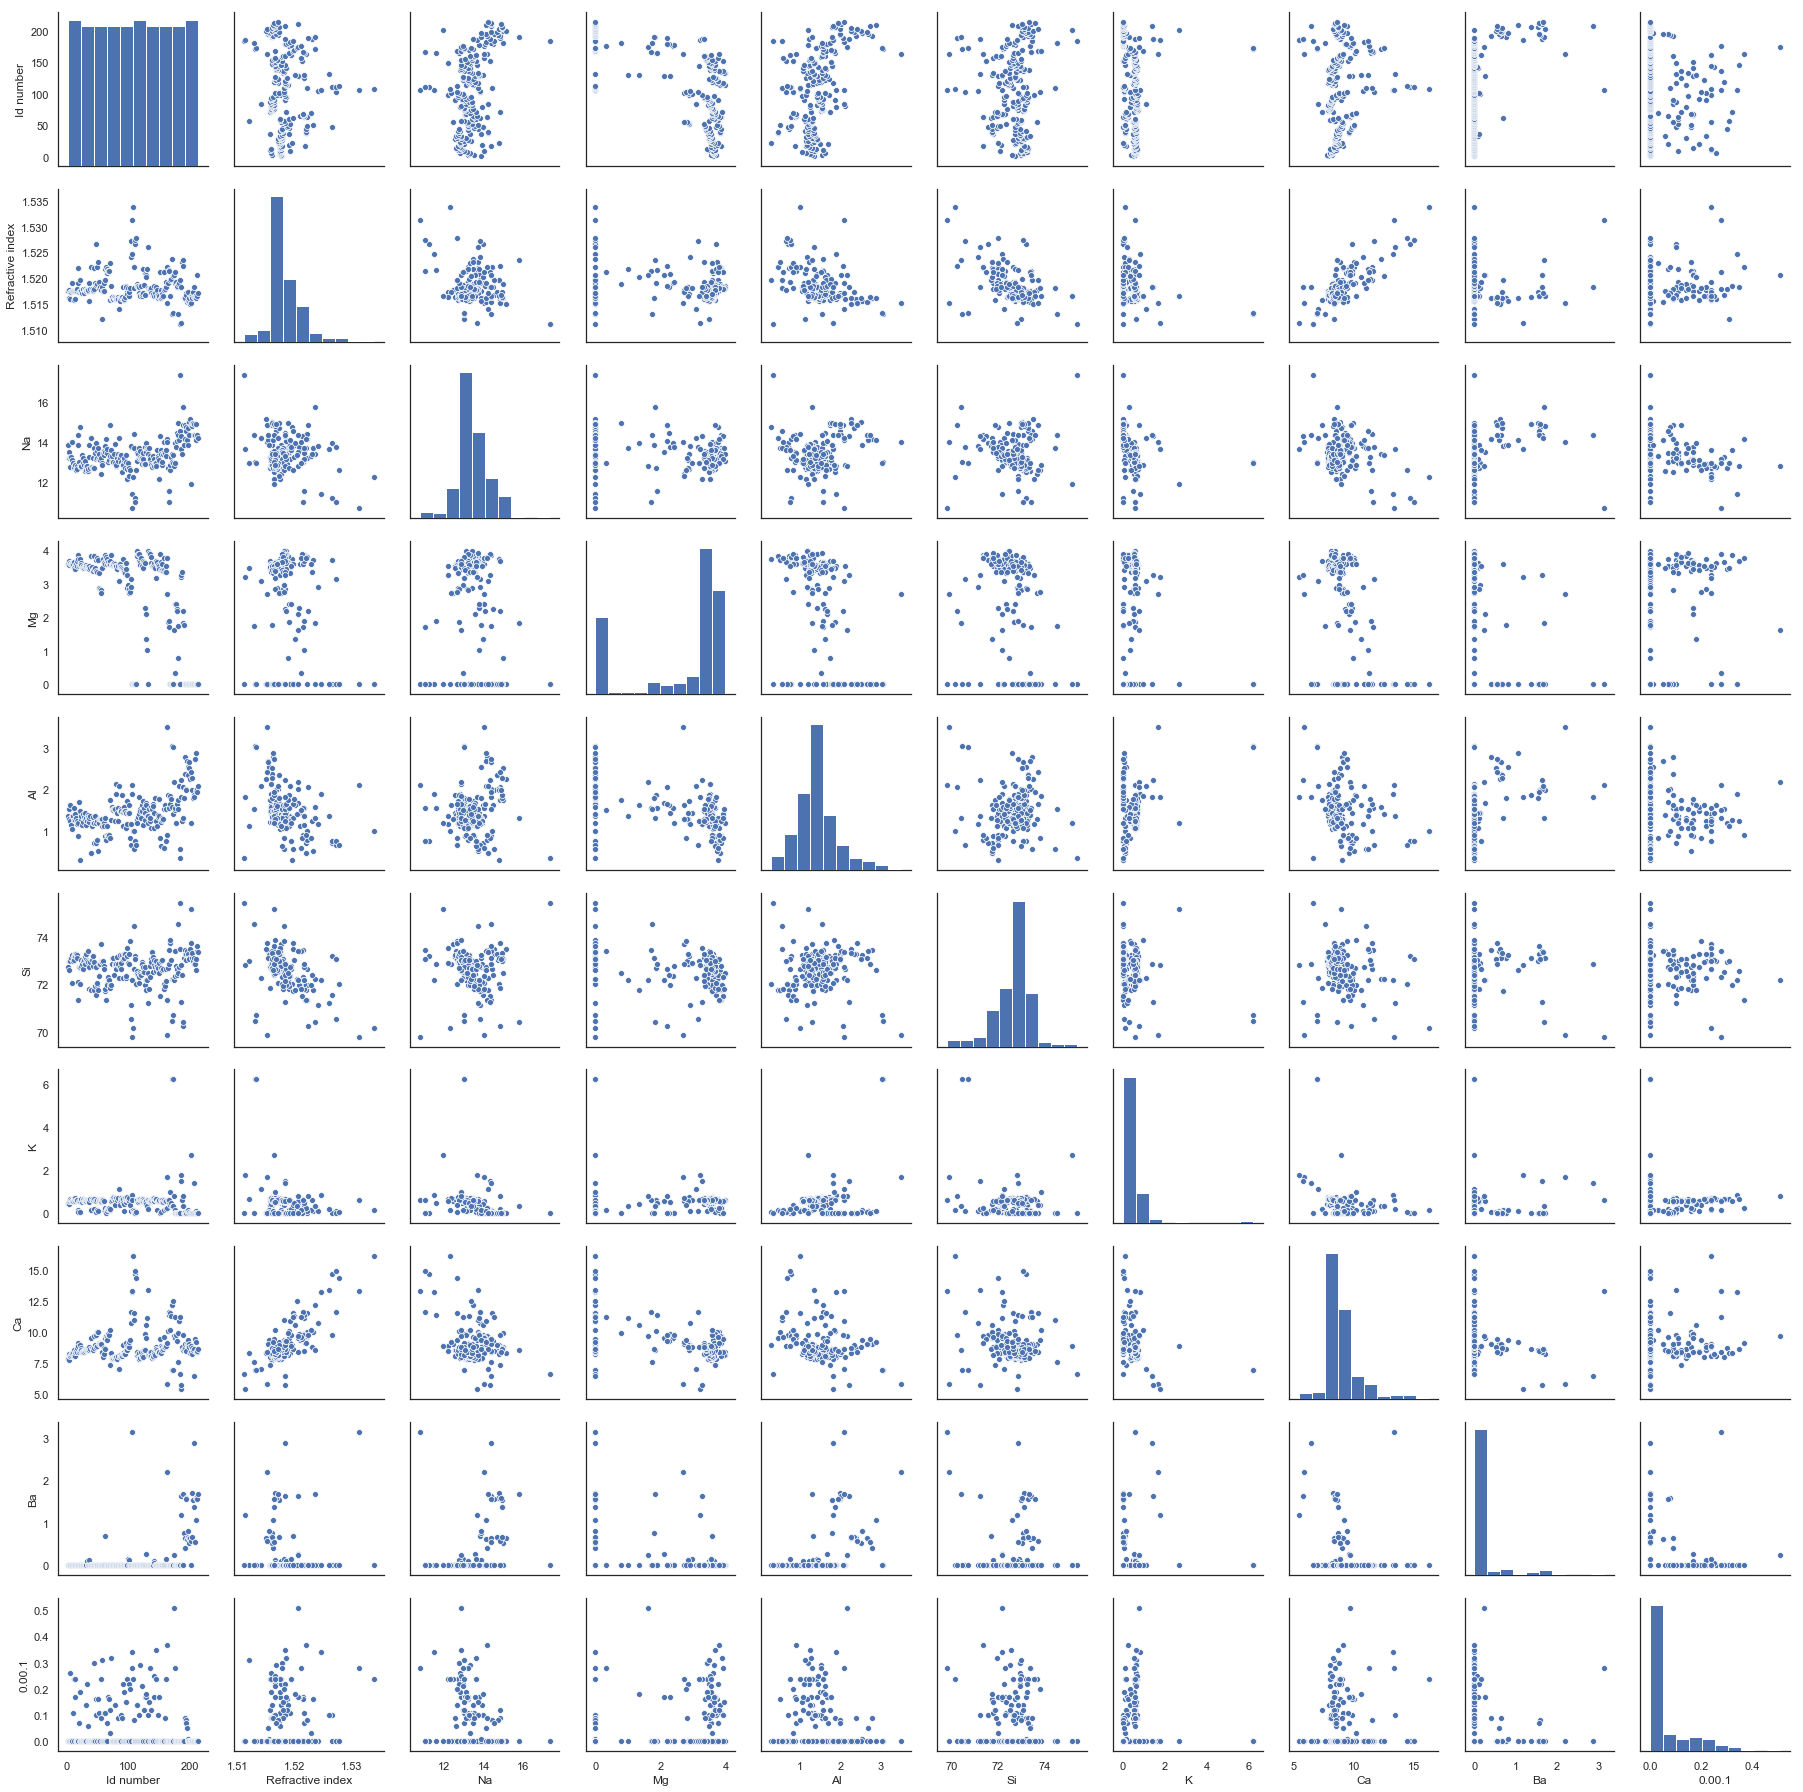

In [48]:
plt.figure(figsize=(8,8))
sns.pairplot(glass[features],palette='coolwarm')
plt.show()

In [162]:
#On most dimensions, the points are scattered. But we can clearly see some strong relationship between Calcium and Refractive index. 
#Silica and RI seem to have an inverse relationship.
#Type 1,2 & 3 have very similar properties 

### Data Cleaning :

In [49]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
Id number           213 non-null int64
Refractive index    213 non-null float64
Na                  213 non-null float64
Mg                  213 non-null float64
Al                  213 non-null float64
Si                  213 non-null float64
K                   213 non-null float64
Ca                  213 non-null float64
Ba                  213 non-null float64
0.00.1              213 non-null float64
Type of class       213 non-null int64
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [50]:
# There are no missing values

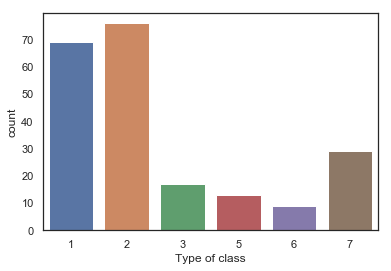

In [51]:
sns.countplot(glass['Type of class'])
plt.show()

In [160]:
# Type 2 and Type 1 has highest occurence in the data set

In [139]:
#Let's remove the observations containing multiple outliers with the function we created in the previous section.

In [140]:
outlier_indices = outlier_hunt(glass[features])
glass = glass.drop(outlier_indices).reset_index(drop=True)
print(glass.shape)

(199, 11)


### Split out Validation Dataset

In [141]:
# Define X as features and y as lablels
X = glass[features] 
y = glass['Type of class'] 
# set a seed and a test size for splitting the dataset 
seed = 7
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size , random_state = seed)

### Data Transfomation :

In [142]:
features_boxcox = []

for feature in features:
    bc_transformed, _ = boxcox(glass[feature]+1)  # shift by 1 to avoid computing log of negative values
    features_boxcox.append(bc_transformed)

features_boxcox = np.column_stack(features_boxcox)
glass_bc = pd.DataFrame(data=features_boxcox, columns=features)
glass_bc['Type of class'] = glass['Type of class']

In [143]:
from sklearn.base import BaseEstimator, TransformerMixin # To create a box-cox transformation class
from scipy.stats import boxcox 

In [144]:
glass_bc.describe()

,Id number,Refractive index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of class
count,199.000000,1.990000e+02,199.000000,199.000000,199.000000,1.990000e+02,199.000000,1.990000e+02,199.000000,199.000000,199.000000
mean,31.305109,4.010749e-03,0.891559,15.387325,0.961304,1.051257e+10,0.345011,2.000244e-01,0.013508,0.019346,2.678392
std,14.376674,1.043459e-17,0.002868,8.318351,0.220205,5.078300e+08,0.213716,8.648452e-07,0.031406,0.027959,2.056545
min,1.627321,4.010749e-03,0.879736,0.000000,0.261767,8.628874e+09,0.000000,2.000209e-01,0.000000,0.000000,1.000000
25%,19.923802,4.010749e-03,0.889608,10.366952,0.854094,1.020820e+10,0.127451,2.000238e-01,0.000000,0.000000,1.000000
50%,32.008296,4.010749e-03,0.891218,19.324244,0.943348,1.058744e+10,0.448273,2.000243e-01,0.000000,0.000000,2.000000
75%,43.399679,4.010749e-03,0.893261,20.738609,1.068209,1.081295e+10,0.481538,2.000249e-01,0.000000,0.051872,3.000000
max,53.872207,4.010749e-03,0.898132,25.489392,1.574985,1.268696e+10,1.400354,2.000265e-01,0.091630,0.069336,7.000000


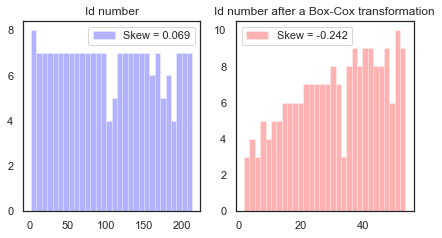

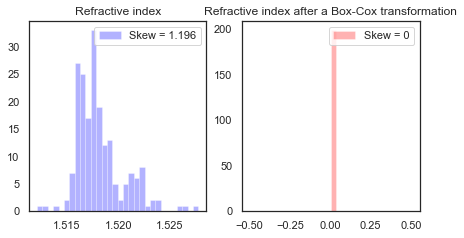

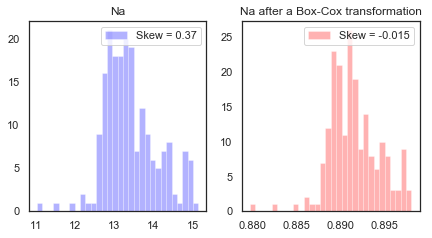

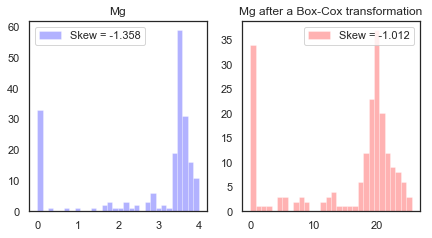

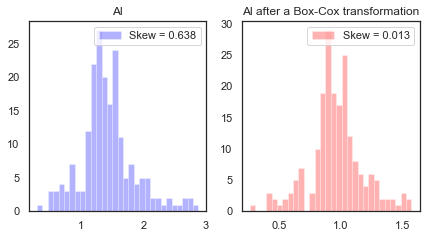

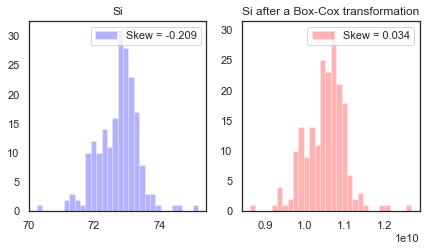

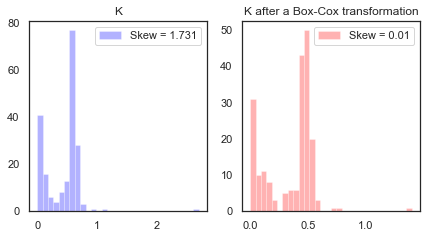

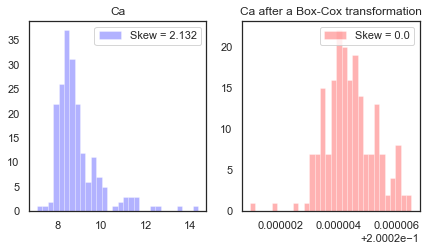

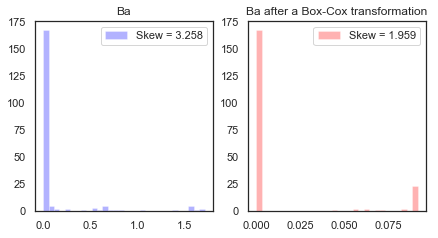

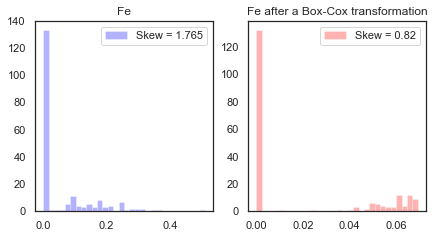

In [145]:
for feature in features:
    fig, ax = plt.subplots(1,2,figsize=(7,3.5))    
    ax[0].hist(glass[feature], color='blue', bins=30, alpha=0.3, label='Skew = %s' %(str(round(glass[feature].skew(),3))) )
    ax[0].set_title(str(feature))   
    ax[0].legend(loc=0)
    ax[1].hist(glass_bc[feature], color='red', bins=30, alpha=0.3, label='Skew = %s' %(str(round(glass_bc[feature].skew(),3))) )
    ax[1].set_title(str(feature)+' after a Box-Cox transformation')
    ax[1].legend(loc=0)
    plt.show()

### 4.Baseline model: train a KNN classifier to serve as the baseline :

In [146]:
from sklearn import datasets
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [147]:
# Standardize the data before modeling  
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [148]:
X_train_std

array([[ 0.69752703,  0.07986425, -0.8009205 , ..., -0.22209462,
        -0.32928578,  2.94472954],
       [ 0.42589246,  1.05306948,  0.19933143, ...,  0.60129048,
         0.42828327,  1.12995436],
       [-1.17195797, -0.22187187, -1.21531058, ..., -0.35161587,
        -0.32928578, -0.58399998],
       ...,
       [-1.20391498, -0.11562676, -0.28650522, ..., -0.45338256,
        -0.32928578, -0.58399998],
       [ 1.75210832,  1.04032006,  1.3567658 , ..., -0.44413104,
         4.27224472, -0.58399998],
       [ 1.38460272,  1.81378448,  2.07123146, ...,  0.77706932,
        -0.32928578, -0.58399998]])

In [149]:
knn = KNeighborsClassifier(n_neighbors=100, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

In [150]:
y_pred = knn.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Accuracy: 0.33
Misclassified samples: 27


In [152]:
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
k_list= list(range(1,50))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, k_list)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


In [153]:
neighbors=list(filter(lambda x:x%2!=0, k_list))

The optimal number of neighbors is 1


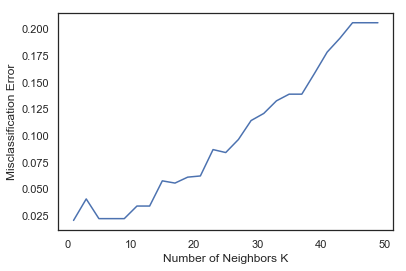

In [154]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### PCA :

In [156]:
from sklearn.decomposition import PCA # dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox # data transform

In [157]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

                      P1    P2    P3    P4    P5    P6    P7   P8   P9
Explained_Variance  2.47  0.96  0.56  0.14  0.06  0.04  0.01  0.0  0.0


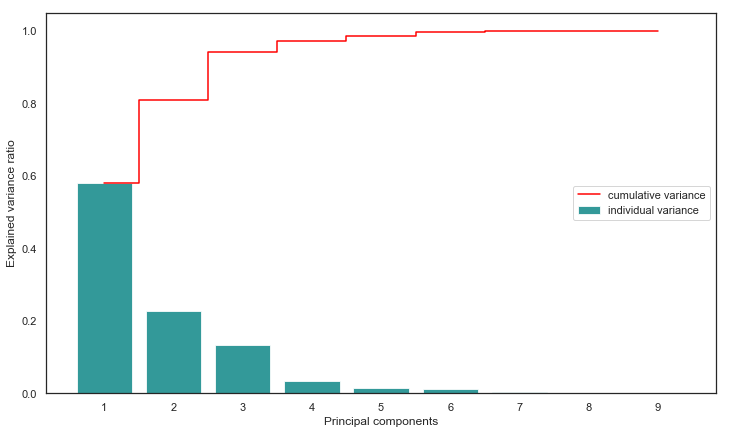

In [159]:
# Performing PCA
X_var = glass[['Refractive index','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
pca = PCA(random_state = 1)
pca.fit(X_var)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,10)],
                      columns=["Explained_Variance"])
print(var_df.T)
plt.figure(figsize=(12,7))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

In [ ]:
# The first five components explained about 95% of total variance